### Check distribution of # of topics per document for all grid search results

In [1]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path

# Base directory containing all topic modeling results
TOPIC_BASE_DIR = "/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics"

In [2]:
def visualize_topic_distribution(topic_dir_path, save_plot=True):
    """
    Visualize topic distribution for a single topic directory
    """
    doc_topics_path = os.path.join(topic_dir_path, "doc_topics.jsonl")
    
    if not os.path.exists(doc_topics_path):
        print(f"Skipping {topic_dir_path}: doc_topics.jsonl not found")
        return None
    
    # Load topic data
    with open(doc_topics_path, "r") as f:
        corpus_topic = [json.loads(line) for line in f]
    
    # Calculate topic numbers per document
    topic_num = []
    for doc in corpus_topic:
        topic_num.append(len(doc['topics']))
    
    # Calculate statistics
    avg_topics = sum(topic_num) / len(topic_num) if topic_num else 0
    max_topics = max(topic_num) if topic_num else 0
    min_topics = min(topic_num) if topic_num else 0
    
    stats = {
        'avg_topics': avg_topics,
        'max_topics': max_topics,
        'min_topics': min_topics,
        'total_docs': len(topic_num)
    }
    
    print(f"\n=== {os.path.basename(topic_dir_path)} ===")
    print(f"Average number of topics per document: {avg_topics:.2f}")
    print(f"Max number of topics per document: {max_topics}")
    print(f"Min number of topics per document: {min_topics}")
    print(f"Total documents: {len(topic_num)}")
    
    if save_plot:
        # Create visualization
        plt.figure(figsize=(12, 8))
        
        # Create subplot layout
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Histogram with KDE
        sns.histplot(topic_num, bins=30, kde=True, ax=ax1)
        ax1.set_title(f'Topic Distribution - {os.path.basename(topic_dir_path)}')
        ax1.set_xlabel('Number of Topics per Document')
        ax1.set_ylabel('Frequency')
        ax1.set_xlim(0, max_topics + 1)
        ax1.grid(axis='y', alpha=0.3)
        
        # Box plot for additional insights
        sns.boxplot(y=topic_num, ax=ax2)
        ax2.set_title('Topic Distribution Box Plot')
        ax2.set_ylabel('Number of Topics per Document')
        ax2.grid(axis='y', alpha=0.3)
        
        # Add statistics text
        stats_text = f'Avg: {avg_topics:.2f}\nMax: {max_topics}\nMin: {min_topics}\nDocs: {len(topic_num)}'
        ax2.text(0.02, 0.98, stats_text, transform=ax2.transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        plt.tight_layout()
        
        # Save plot
        plot_path = os.path.join(topic_dir_path, "topic_distribution.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f"Saved plot to: {plot_path}")
    
    return stats


=== neighbors_10_components_15_mintopic_15 ===
Average number of topics per document: 2.41
Max number of topics per document: 10
Min number of topics per document: 0
Total documents: 3633
Saved plot to: /home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/neighbors_10_components_15_mintopic_15/topic_distribution.png

=== neighbors_30_components_5_mintopic_5 ===
Average number of topics per document: 2.60
Max number of topics per document: 14
Min number of topics per document: 0
Total documents: 3633
Saved plot to: /home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/neighbors_10_components_15_mintopic_15/topic_distribution.png

=== neighbors_30_components_5_mintopic_5 ===
Average number of topics per document: 2.60
Max number of topics per document: 14
Min number of topics per document: 0
Total documents: 3633
Saved plot to: /home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/neighbors_30_components_5_mintopic_5/topic_distribution.png

===

/tmp/ipykernel_2904872/3984261377.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


Saved plot to: /home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/neighbors_15_components_15_mintopic_5/topic_distribution.png

=== neighbors_30_components_15_mintopic_5 ===
Average number of topics per document: 2.50
Max number of topics per document: 12
Min number of topics per document: 0
Total documents: 3633


/tmp/ipykernel_2904872/3984261377.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


Saved plot to: /home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/neighbors_30_components_15_mintopic_5/topic_distribution.png

=== neighbors_30_components_5_mintopic_15 ===
Average number of topics per document: 1.20
Max number of topics per document: 4
Min number of topics per document: 1
Total documents: 3633
Saved plot to: /home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/neighbors_30_components_5_mintopic_15/topic_distribution.png

=== neighbors_10_components_10_mintopic_10 ===
Average number of topics per document: 2.46
Max number of topics per document: 11
Min number of topics per document: 0
Total documents: 3633
Saved plot to: /home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/neighbors_30_components_5_mintopic_15/topic_distribution.png

=== neighbors_10_components_10_mintopic_10 ===
Average number of topics per document: 2.46
Max number of topics per document: 11
Min number of topics per document: 0
Total documents: 3633
Sav

,config_dir,avg_topics,max_topics,min_topics,total_docs
29,0606-biobert-mnli-reduce-outlier,3.951005,16,1,3633
13,neighbors_10_components_5_mintopic_5,3.065511,13,0,3633
16,0606-pritamdeka-biobert-pos-keybert-mmr,3.056427,17,0,3633
8,0612-01,3.055326,14,0,3633
18,0606-biobert-mnli,3.027801,14,0,3633
3,neighbors_10_components_10_mintopic_5,3.023947,15,0,3633
23,0612-window_size_2-step_2,2.996146,15,0,3633
12,neighbors_10_components_15_mintopic_5,2.956510,12,0,3633
24,neighbors_15_components_5_mintopic_5,2.827415,13,0,3633
26,neighbors_15_components_10_mintopic_5,2.777594,12,0,3633


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

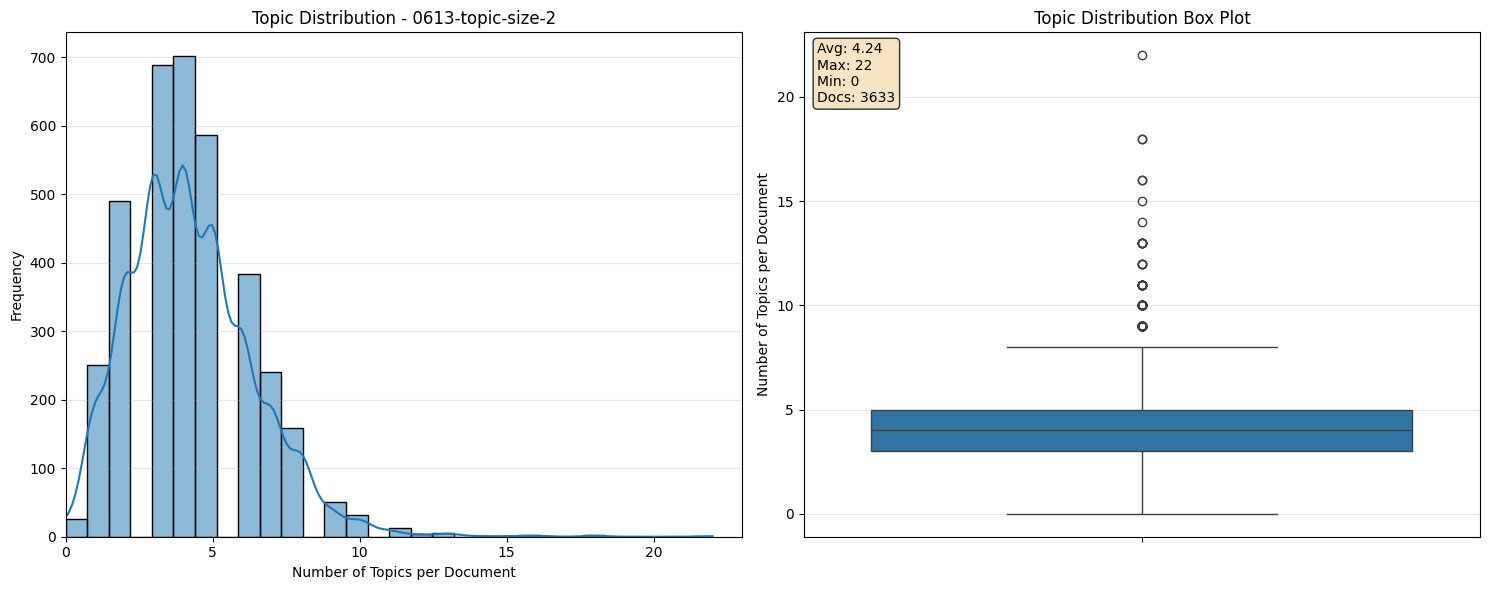

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [4]:
def process_all_topic_directories(base_dir):
    """
    Process all topic directories and create visualizations
    """
    all_stats = []
    
    # Find all subdirectories that contain doc_topics.jsonl
    try:
        for root, dirs, files in os.walk(base_dir):
            try:
                if "doc_topics.jsonl" in files:
                    stats = visualize_topic_distribution(root, save_plot=True)
                    if stats:
                        stats['config_dir'] = os.path.basename(root)
                        stats['full_path'] = root
                        all_stats.append(stats)
            except PermissionError:
                print(f"Permission denied: Skipping {root}")
                continue
            except Exception as e:
                print(f"Error processing {root}: {e}")
                continue
    except PermissionError:
        print(f"Permission denied: Cannot access base directory {base_dir}")
        return None
    except Exception as e:
        print(f"Error walking directory {base_dir}: {e}")
        return None
    
    # Create summary DataFrame
    if all_stats:
        summary_df = pd.DataFrame(all_stats)
        summary_df = summary_df.sort_values('avg_topics', ascending=False)
        
        # Save summary
        summary_path = os.path.join(base_dir, "topic_distribution_summary.csv")
        summary_df.to_csv(summary_path, index=False)
        print(f"\nSaved summary to: {summary_path}")
        
        # Display summary
        print("\n=== SUMMARY ===")
        display(summary_df[['config_dir', 'avg_topics', 'max_topics', 'min_topics', 'total_docs']])
        
        return summary_df
    else:
        print("No topic directories found!")
        return None

# Process all directories
summary_stats = process_all_topic_directories(TOPIC_BASE_DIR)

In [5]:
# Create overall comparison visualization
if summary_stats is not None and len(summary_stats) > 0:
    plt.figure(figsize=(15, 10))
    
    # Create subplots for comparison
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Average topics comparison
    summary_stats_sorted = summary_stats.sort_values('avg_topics')
    ax1.barh(range(len(summary_stats_sorted)), summary_stats_sorted['avg_topics'])
    ax1.set_yticks(range(len(summary_stats_sorted)))
    ax1.set_yticklabels(summary_stats_sorted['config_dir'], fontsize=8)
    ax1.set_xlabel('Average Topics per Document')
    ax1.set_title('Average Topics per Document by Configuration')
    ax1.grid(axis='x', alpha=0.3)
    
    # 2. Max topics comparison
    summary_stats_sorted = summary_stats.sort_values('max_topics')
    ax2.barh(range(len(summary_stats_sorted)), summary_stats_sorted['max_topics'])
    ax2.set_yticks(range(len(summary_stats_sorted)))
    ax2.set_yticklabels(summary_stats_sorted['config_dir'], fontsize=8)
    ax2.set_xlabel('Maximum Topics per Document')
    ax2.set_title('Maximum Topics per Document by Configuration')
    ax2.grid(axis='x', alpha=0.3)
    
    # 3. Scatter plot: avg vs max topics
    ax3.scatter(summary_stats['avg_topics'], summary_stats['max_topics'], alpha=0.7)
    ax3.set_xlabel('Average Topics per Document')
    ax3.set_ylabel('Maximum Topics per Document')
    ax3.set_title('Average vs Maximum Topics per Document')
    ax3.grid(alpha=0.3)
    
    # Add labels for outliers
    for i, row in summary_stats.iterrows():
        if row['max_topics'] > summary_stats['max_topics'].quantile(0.8):
            ax3.annotate(row['config_dir'], 
                        (row['avg_topics'], row['max_topics']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, alpha=0.7)
    
    # 4. Total documents comparison
    ax4.bar(range(len(summary_stats)), summary_stats['total_docs'])
    ax4.set_xticks(range(len(summary_stats)))
    ax4.set_xticklabels(summary_stats['config_dir'], rotation=45, ha='right', fontsize=8)
    ax4.set_ylabel('Total Documents')
    ax4.set_title('Total Documents by Configuration')
    ax4.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    
    # Save comparison plot
    comparison_plot_path = os.path.join(TOPIC_BASE_DIR, "topic_distribution_comparison.png")
    plt.savefig(comparison_plot_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"Saved comparison plot to: {comparison_plot_path}")

Saved comparison plot to: /home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/topic_distribution_comparison.png


<Figure size 1500x1000 with 0 Axes>

### Process topic info dataframes for all directories

In [6]:
def process_topic_info_dataframes(base_dir):
    """
    Process topic_info_dataframe.pkl files in all topic directories
    """
    topic_info_summary = []
    
    for root, dirs, files in os.walk(base_dir):
        pkl_path = os.path.join(root, "topic_info_dataframe.pkl")
        csv_path = os.path.join(root, "topic_info_dataframe.csv")
        
        if os.path.exists(pkl_path):
            try:
                # Load pickle file
                topic_info_df = pd.read_pickle(pkl_path)
                
                # Save as CSV if not exists
                if not os.path.exists(csv_path):
                    topic_info_df.to_csv(csv_path, index=False)
                    print(f"Saved CSV: {csv_path}")
                
                # Collect summary statistics
                config_name = os.path.basename(root)
                num_topics = len(topic_info_df) - 1  # Exclude outlier topic (-1)
                
                summary_info = {
                    'config_dir': config_name,
                    'num_topics': num_topics,
                    'total_docs_in_topics': topic_info_df['Count'].sum() if 'Count' in topic_info_df.columns else 0,
                    'avg_docs_per_topic': topic_info_df['Count'].mean() if 'Count' in topic_info_df.columns else 0,
                    'max_docs_per_topic': topic_info_df['Count'].max() if 'Count' in topic_info_df.columns else 0,
                    'min_docs_per_topic': topic_info_df['Count'].min() if 'Count' in topic_info_df.columns else 0,
                }
                
                topic_info_summary.append(summary_info)
                
            except Exception as e:
                print(f"Error processing {pkl_path}: {e}")
    
    # Create and save summary
    if topic_info_summary:
        topic_summary_df = pd.DataFrame(topic_info_summary)
        topic_summary_df = topic_summary_df.sort_values('num_topics', ascending=False)
        
        summary_path = os.path.join(base_dir, "topic_info_summary.csv")
        topic_summary_df.to_csv(summary_path, index=False)
        print(f"Saved topic info summary to: {summary_path}")
        
        print("\n=== TOPIC INFO SUMMARY ===")
        display(topic_summary_df)
        
        return topic_summary_df
    else:
        print("No topic info files found!")
        return None

# Process all topic info dataframes
topic_summary = process_topic_info_dataframes(TOPIC_BASE_DIR)

Saved topic info summary to: /home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/topic_info_summary.csv

=== TOPIC INFO SUMMARY ===


,config_dir,num_topics,total_docs_in_topics,avg_docs_per_topic,max_docs_per_topic,min_docs_per_topic
26,0613-topic-size-2,3726,35130,9.425812,12629,2
12,neighbors_10_components_15_mintopic_5,1010,35130,34.747774,16899,5
13,neighbors_10_components_5_mintopic_5,990,35130,35.449041,17128,5
3,neighbors_10_components_10_mintopic_5,963,35130,36.441909,16275,5
23,0612-window_size_2-step_2,921,35130,38.101952,16132,5
8,0612-01,918,35130,38.226333,15634,5
19,neighbors_15_components_15_mintopic_5,887,35130,39.560811,18497,5
27,neighbors_15_components_10_mintopic_5,866,35130,40.519031,18105,5
16,0606-pritamdeka-biobert-pos-keybert-mmr,864,35130,40.612717,16253,5
30,0606-biobert-mnli-reduce-outlier,854,35130,41.087719,16928,5


In [ ]:
# ...existing code...

### Generate comprehensive report

In [7]:
def generate_comprehensive_report(base_dir, distribution_summary, topic_info_summary):
    """
    Generate a comprehensive report combining all analyses
    """
    report_lines = []
    report_lines.append("# Topic Modeling Grid Search Analysis Report")
    report_lines.append(f"Generated from: {base_dir}")
    report_lines.append(f"Total configurations analyzed: {len(distribution_summary) if distribution_summary is not None else 0}")
    report_lines.append("")
    
    if distribution_summary is not None and topic_info_summary is not None:
        # Merge the two summaries
        merged_summary = distribution_summary.merge(
            topic_info_summary[['config_dir', 'num_topics', 'avg_docs_per_topic']], 
            on='config_dir', 
            how='left'
        )
        
        report_lines.append("## Top Configurations by Average Topics per Document")
        top_avg = merged_summary.nlargest(5, 'avg_topics')
        for _, row in top_avg.iterrows():
            report_lines.append(f"- **{row['config_dir']}**: {row['avg_topics']:.2f} avg topics, {row['num_topics']} total topics")
        report_lines.append("")
        
        report_lines.append("## Top Configurations by Total Number of Topics")
        top_num = merged_summary.nlargest(5, 'num_topics')
        for _, row in top_num.iterrows():
            report_lines.append(f"- **{row['config_dir']}**: {row['num_topics']} topics, {row['avg_topics']:.2f} avg per doc")
        report_lines.append("")
        
        report_lines.append("## Configuration Analysis")
        report_lines.append(f"- Average topics per document range: {merged_summary['avg_topics'].min():.2f} - {merged_summary['avg_topics'].max():.2f}")
        report_lines.append(f"- Total topics range: {merged_summary['num_topics'].min()} - {merged_summary['num_topics'].max()}")
        report_lines.append(f"- Most documents in single config: {merged_summary['total_docs'].max()}")
        report_lines.append("")
        
        # Save detailed summary
        detailed_summary_path = os.path.join(base_dir, "detailed_analysis_summary.csv")
        merged_summary.to_csv(detailed_summary_path, index=False)
        report_lines.append(f"Detailed analysis saved to: {detailed_summary_path}")
    
    # Save report
    report_path = os.path.join(base_dir, "analysis_report.md")
    with open(report_path, 'w', encoding='utf-8') as f:
        f.write('\n'.join(report_lines))
    
    print(f"Comprehensive report saved to: {report_path}")
    print("\n" + "\n".join(report_lines))

# Generate comprehensive report
if summary_stats is not None and topic_summary is not None:
    generate_comprehensive_report(TOPIC_BASE_DIR, summary_stats, topic_summary)

Comprehensive report saved to: /home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/analysis_report.md

# Topic Modeling Grid Search Analysis Report
Generated from: /home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics
Total configurations analyzed: 33

## Top Configurations by Average Topics per Document
- **0606-biobert-mnli-reduce-outlier**: 3.95 avg topics, 854 total topics
- **neighbors_10_components_5_mintopic_5**: 3.07 avg topics, 990 total topics
- **0606-pritamdeka-biobert-pos-keybert-mmr**: 3.06 avg topics, 864 total topics
- **0612-01**: 3.06 avg topics, 918 total topics
- **0606-biobert-mnli**: 3.03 avg topics, 843 total topics

## Top Configurations by Total Number of Topics
- **neighbors_10_components_15_mintopic_5**: 1010 topics, 2.96 avg per doc
- **neighbors_10_components_5_mintopic_5**: 990 topics, 3.07 avg per doc
- **neighbors_10_components_10_mintopic_5**: 963 topics, 3.02 avg per doc
- **0612-window_size_2-step_2**: 921 topics, 3.00 av

In [ ]:
import pandas as pd
topic_dist = pd.read_csv(os.path.join(TOPIC_BASE_DIR, "topic_distribution_summary.csv"))

# keep avg_topics > 2.